## Прогноз оттока банковских клиентов

**Задача:** по имеющимся историческим данным о поведении клиентов построить модель, которая будет прогнозировать отток.

**Описание данных:**</br>
</br>
**RowNumber** — индекс строки в данных</br>
**CustomerId** — уникальный идентификатор клиента</br>
**Surname** — фамилия</br>
**CreditScore** — кредитный рейтинг</br>
**Geography** — страна проживания</br>
**Gender** — пол</br>
**Age** — возраст</br>
**Tenure** — сколько лет человек является клиентом банка</br>
**Balance** — баланс на счёте</br>
**NumOfProducts** — количество продуктов банка, используемых клиентом</br>
**HasCrCard** — наличие кредитной карты</br>
**IsActiveMember** — активность клиента</br>
**EstimatedSalary** — предполагаемая зарплата</br>
**Exited** — факт ухода клиента</br>

**План работы:**
- изучение и предобработка данных
- подготовка данных
- обучение модели без учета баланса классов
- балансировка классов и повторное обучение модели
- настройка гиперпараметров модели
- финальное тестирование

### Изучение и преобработка данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
import matplotlib.ticker as ticker


In [2]:
#откроем файл с данными

try:
    users = pd.read_csv('datasets/Churn.csv')
except FileNotFoundError:
    users = pd.read_csv('/datasets/Churn.csv') 

In [3]:
#ознакомимся с содержимым данных

display(users.head(), users.info(), users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
#посмотрим данные о категориальных признаках

display(users['Geography'].unique())
display(users['Gender'].unique())
display(users['Surname'].nunique())

array(['France', 'Spain', 'Germany'], dtype=object)

array(['Female', 'Male'], dtype=object)

2932

В датасете 14 колонок с категориальными и количественными переменными. </br>
Видим, что в столбце 'tenure' пропущено около 1000 значений, их нужно заполнить.</br>
В колонке с ожидаемой зарплатой минимальное значение - всего 11 евро, нужно ознакомиться с содержимым столбца.

In [5]:
#проверим полные дубликаты

users.duplicated().sum()

0

In [6]:
#для удобства приведем названия колонок к нижнему регистру

users.columns = map(str.lower, users.columns)

In [7]:
print('Среднее до заполнения пропусков:', users['tenure'].mean())
print('Медиана до заполнения пропусков:', users['tenure'].median())
print('Стандартное отклонение до заполнения пропусков:', users['tenure'].std())

Среднее до заполнения пропусков: 4.997690023099769
Медиана до заполнения пропусков: 5.0
Стандартное отклонение до заполнения пропусков: 2.894723234821264


In [8]:
#заполним пропуски в колонке 'tenure' с помощью KNNImputer

imputer = KNNImputer()
users['tenure'] = imputer.fit_transform(users[['tenure']])

In [9]:
print('Среднее после заполнения пропусков:', users['tenure'].mean())
print('Медиана после заполнения пропусков:', users['tenure'].median())
print('Стандартное отклонение после заполнения пропусков:', users['tenure'].std())

Среднее после заполнения пропусков: 4.997690023099746
Медиана после заполнения пропусков: 4.997690023099769
Стандартное отклонение после заполнения пропусков: 2.760010310622057


In [10]:
#изучим содержимое колонки 'estimatedsalary'

print(sorted(users['estimatedsalary']))

[11.58, 90.07, 91.75, 96.27, 106.67, 123.07, 142.81, 143.34, 178.19, 216.27, 236.45, 247.36, 287.99, 332.81, 343.38, 371.05, 417.41, 428.23, 440.2, 447.73, 468.94, 479.54, 487.3, 502.7, 523.0, 548.52, 555.28, 582.53, 582.59, 598.8, 600.36, 645.61, 653.58, 667.66, 676.06, 683.37, 690.84, 705.18, 706.5, 735.79, 738.88, 747.88, 753.37, 777.37, 807.06, 820.46, 823.36, 823.96, 824.0, 861.4, 878.87, 898.51, 933.38, 937.15, 944.41, 961.57, 978.66, 980.93, 994.86, 1002.39, 1050.33, 1055.66, 1099.95, 1112.76, 1114.12, 1118.31, 1140.02, 1173.23, 1187.88, 1235.49, 1243.97, 1262.83, 1271.51, 1276.87, 1285.81, 1299.75, 1351.41, 1354.25, 1364.54, 1375.46, 1408.68, 1474.79, 1485.27, 1528.4, 1539.21, 1540.89, 1557.82, 1561.58, 1568.91, 1591.19, 1643.11, 1676.92, 1703.58, 1710.89, 1713.1, 1775.52, 1787.85, 1790.48, 1795.93, 1801.77, 1843.24, 1852.58, 1871.25, 1907.66, 1914.41, 1950.93, 1985.41, 2002.5, 2010.98, 2019.78, 2035.94, 2048.55, 2053.42, 2079.2, 2085.32, 2101.89, 2139.25, 2150.22, 2151.17, 216

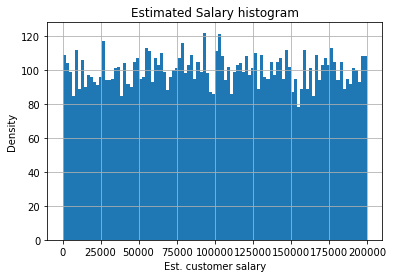

In [11]:
users['estimatedsalary'].hist(bins=100);
plt.title('Estimated Salary histogram', fontsize=12)
plt.xlabel('Est. customer salary')
plt.ylabel('Density')
plt.show()

11 (вероятно) евро - не единственная странная цифра в колонке с ожидаемыми зарплатами. Видимо, данные сюда вносятся исходя из движения средств клиента на счёте какой-то внутренней моделью банка. Дополнительная обработка здесь не требуется.

In [12]:
#посмотрим, какой процент клиентов из текущей выборки покинул банк

users['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

In [13]:
#посмотрим корреляцию между фактом ухода и остальными признаками

data_corr = users.corr()
abs(data_corr['exited']).sort_values(ascending=False)

exited             1.000000
age                0.285323
isactivemember     0.156128
balance            0.118533
numofproducts      0.047820
creditscore        0.027094
rownumber          0.016571
tenure             0.015988
estimatedsalary    0.012097
hascrcard          0.007138
customerid         0.006248
Name: exited, dtype: float64

### Выводы

Нам доступны 10.000 записей о банковском поведении клиентов обоих полов из Франции, Германии и Испании. Из банка ушли около 20% из них, т.е. по целевому признаку выборка является несбалансированной.</br>
Мы заполнили пропуски в столбце длительностью сотрудничества с банком с помощью KNNImputer с базовыми настройками (метод работает по принципу ближайших соседей).</br>
Также для удобства мы привели к нижнему регистру названия столбцов.</br>
</br>
С точки зрения дальнейшего обучения модели бесполезны столбцы 'rownumber', 'cusomerid' и 'surname', содержащие номер ряда, внутренний id банка и фамилию клиента.</br>
</br>
Столбцы 'gender' и 'geography' (пол и страна) - категориальные, их необходимо преобразовать прямым или порядковым кодированием.</br>
</br>
Количественные признаки:</br>
- кредитный рейтинг меняется в диапазоне от 350 до 850 со средним около 650
- количество лет, которые клиент сотрудничает с банком меняется от 0 до 10 лет, среднее и медиана - 5 лет
- баланс в (видимо) евро меняется от 0 до 250.000
- число продуктов банка, которым пользуется клиент - от 1 до 4, медиана равна 1
- ожидаемая зарплата до 11 до 200.000 (вероятно, прогнозируется банком по движению средств на счёте)
</br>
</br>

Бинарные признаки:</br>
- наличие кредитной карты
- является ли человек активным пользователем банка
- ушел или не ушёл человек из банка (целевой признак)
</br>


Количественные признаки изменяются в очень разных диапазонах и потребуют масштабирования.

### Подготовка данных

В этом разделе разобьем данные на тестовую, валидационную и обучающую выборки в соотношении 20/20/60, обработаем категориальные признаки и масштабируем количественные признаки (бинарные оставим как есть).

In [14]:
#отберем "полезные" признаки в отдельный датафрейм, а целевой признак - в отдельный столбец

features = users[['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary']]
target = users['exited']

In [15]:
#разобьем признаки и целевой признак на обучающую, валидационную и тестовую выборки с учетом существующего баланса классов

features_for_work, features_test, target_for_work, target_test = (
    train_test_split(features, target, test_size=0.2, stratify=target, random_state=17))
features_train, features_valid, target_train, target_valid = (
    train_test_split(features_for_work, target_for_work, test_size=0.25, stratify=target_for_work, random_state=17))

In [16]:
#убедимся, что баланс классов соблюден

display(target_test.value_counts(normalize=True))
display(target_train.value_counts(normalize=True))
display(target_valid.value_counts(normalize=True))

0    0.7965
1    0.2035
Name: exited, dtype: float64

0    0.796333
1    0.203667
Name: exited, dtype: float64

0    0.796
1    0.204
Name: exited, dtype: float64

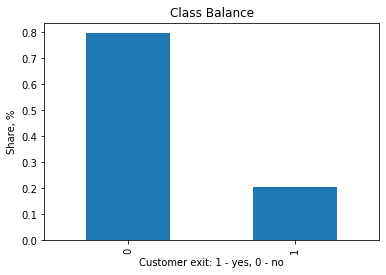

In [17]:
#отобразим распределение классов в обучающей выборке

target_train.value_counts(normalize=True).plot(kind='bar');
plt.title('Class Balance', fontsize=12)
plt.xlabel('Customer exit: 1 - yes, 0 - no')
plt.ylabel('Share, %')
plt.show()

Как видим, классы в целевом признаке несбалансированы. Улучшением модели по этому признаку мы займемся на втором этапе.

Преобразуем категориальные признаки в количественные с помощью прямого кодирования One-Hot-Encoding со сбрасыванием первого столбца, чтобы избежать избыточных данных в модели.

In [18]:
#преобразуем категориальные признаки

features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [19]:
#смотрим, что получилось

features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
4320,701,36,7.00000,95448.32,2,1,0,189085.07,1,0,1
2664,586,29,4.99769,0.00,2,1,1,142238.54,0,0,1
2766,705,30,1.00000,0.00,1,1,1,181300.32,0,0,1
7953,622,33,3.00000,96926.12,2,1,0,48553.77,1,0,1
312,642,38,3.00000,0.00,2,0,0,171463.83,0,0,1


Следующим этапом проведем масштабирования признаков методом StandartScaler.

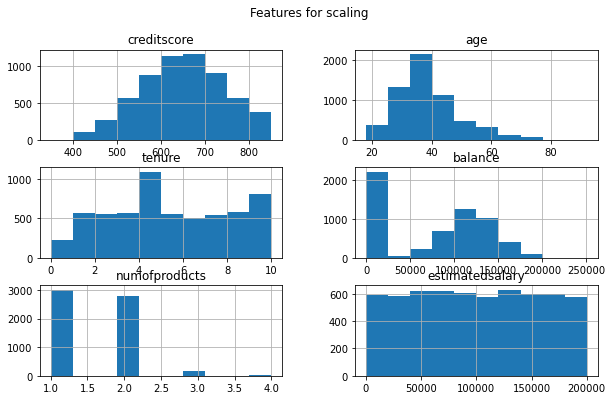

In [20]:
#вынесем в отдельную переменную названия признаков, требующих масштабирования
#отобразим их в виде гистограмм

numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
features_train[numeric].hist(figsize=(10,6));
plt.suptitle('Features for scaling', fontsize=12)
plt.show()

In [21]:
#проведем масштабирование

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [22]:
#посмотрим, что получилось

features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
4320,0.539702,-0.273366,0.719904,0.325772,0.796219,1,0,1.560813,1,0,1
2664,-0.651925,-0.938452,-0.005408,-1.211400,0.796219,1,1,0.743461,0,0,1
2766,0.581150,-0.843440,-1.453523,-1.211400,-0.920387,1,1,1.424989,0,0,1
7953,-0.278894,-0.558403,-0.729047,0.349571,0.796219,1,0,-0.891097,1,0,1
312,-0.071655,-0.083342,-0.729047,-1.211400,0.796219,0,0,1.253367,0,0,1


In [23]:
#и посмотрим, как изменились признаки

features_train.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
count,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000
mean,-7.112829e-17,-6.716849e-17,-4.298413e-17,-5.223599e-17,3.383220e-16,0.703000,0.516500,1.146305e-16,0.253167,0.245667,0.535833
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,0.456975,0.499769,1.000083e+00,0.434862,0.430518,0.498756
min,-3.097351e+00,-1.983587e+00,-1.815761e+00,-1.211400e+00,-9.203867e-01,0.000000,0.000000,-1.736555e+00,0.000000,0.000000,0.000000
25%,-6.933732e-01,-6.534151e-01,-7.290474e-01,-1.211400e+00,-9.203867e-01,0.000000,0.000000,-8.468864e-01,0.000000,0.000000,0.000000
50%,1.124101e-02,-1.783538e-01,-5.408498e-03,3.386068e-01,-9.203867e-01,1.000000,1.000000,-8.631294e-03,0.000000,0.000000,1.000000
75%,6.951313e-01,4.867319e-01,7.199039e-01,8.279503e-01,7.962189e-01,1.000000,1.000000,8.549920e-01,1.000000,0.000000,1.000000
max,2.083636e+00,5.047320e+00,1.806617e+00,2.829251e+00,4.229430e+00,1.000000,1.000000,1.750740e+00,1.000000,1.000000,1.000000


Строго говоря, StandartScaler исходит из предположения, что масштабируемый признак распределён нормально, однако в нашем случае это не так. Кроме того, после преобразования масштаб у признаков остался разный, а бинарные признаки, по сравнению с количественными, оказываются смещены относительно нуля.

### Выводы

Проведен отбор признаков и разбиение выборки на обучающую, валидационную и тестовую.</br>
Изучен баланс классов.</br>
Проведено прямое кодирование категориальных признаков.</br>
Проведено масштабирование количественных признаков.</br>

### Обучение моделей без учета баланса классов

В этом разделе мы инициируем и обучим несколько моделей с параметрами "по умолчанию":
- логистическую регрессию
- дерево решений
- случайный лес
- метод К-ближайших соседей
- метод оборных векторов
- наивный байесовский классификатор
</br>
</br>
Для каждой модели рассчитаем F1 и площадь под ROC-кривой и внесём эти данные в отдельную таблицу.</br>
Кроме того, проверим модели на адекватность с помощью DummyClassifier.

In [24]:
#Начнём с логистической регрессии

best_f1 = 0
best_iter = 0

for max_iter in range (30, 301, 10):
    model = LogisticRegression(max_iter=max_iter, random_state=17)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_iter = max_iter

probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)
print('Best f1', best_f1, 'was achieved with max_iter =', best_iter)

model = LogisticRegression(max_iter=best_iter, random_state=17);
model.fit(features_train, target_train);

Best f1 0.332129963898917 was achieved with max_iter = 30


In [25]:
#создадим датафрейм, куда будем вносить данные об f1 и roc-auc для каждой модели

list_of_col = ['model', 'f1', 'roc-auc score']
score_table = pd.DataFrame([['LogisticRegression', best_f1, roc_auc_value]], columns=list_of_col)
score_table

,model,f1,roc-auc score
0,LogisticRegression,0.33213,0.756922


In [26]:
#определим функцию, которая будет рассчитывать метрики и записывать их в датафрейм

def get_scores(target_valid, predicted_valid, score_table):
    f1_value = f1_score(target_valid, predicted_valid)
    #print(f1_value)

    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)

    score_table = score_table.append(pd.DataFrame(
        [[type(model).__name__, f1_value, roc_auc_value]],
        columns=list_of_col), 
        ignore_index=True)
    return score_table

In [27]:
#Решающее Дерево

best_f1 = 0
best_tree_depth = 0

for tree_depth in range (1, 16):
    model = DecisionTreeClassifier(max_depth=tree_depth, random_state=17)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_tree_depth = tree_depth
        
print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth)
model = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=17)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5838150289017341 was achieved with tree_depth = 7


In [28]:
#Случайный лес

best_f1 = 0
best_tree_depth = 0
best_nestimators = 0

for tree_depth in range(1, 16):
    for estimators in range(10, 151, 10):
        model = RandomForestClassifier(n_estimators=estimators, max_depth=tree_depth, random_state=17)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1_value = f1_score(target_valid, predicted_valid)
        if f1_value > best_f1:
            best_f1 = f1_value
            best_tree_depth = tree_depth
            best_nestimators = estimators

print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth, 'and n_estimators =', best_nestimators)
model = RandomForestClassifier(n_estimators=best_nestimators, max_depth=best_tree_depth, random_state=17)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5996908809891809 was achieved with tree_depth = 9 and n_estimators = 10


In [29]:
#K-ближайших соседей

best_f1 = 0
best_nneighbors = 0

for neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_nneighbors = neighbors

print('Best f1', best_f1, 'was achieved with n_neighbors =', best_nneighbors)
model = KNeighborsClassifier(n_neighbors=best_nneighbors)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5462686567164179 was achieved with n_neighbors = 7


In [30]:
#метод опорных векторов (у SVC нет метода predict_proba, поэтому функцию get_scores мы не используем)
kernel_vars = ['linear', 'poly', 'rbf', 'sigmoid']
opt_kernel = []
best_f1 = 0

for kernel_var in kernel_vars:
    model = SVC(kernel=kernel_var)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        opt_kernel = kernel_var

print('Best f1', best_f1, 'was achieved with', opt_kernel)
model = SVC(kernel=opt_kernel)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

f1_value = f1_score(target_valid, predicted_valid)
decision_score = model.decision_function(features_valid)
roc_auc_value = roc_auc_score(target_valid, decision_score)

score_table = score_table.append(pd.DataFrame(
    [[type(model).__name__, f1_value, roc_auc_value]],
    columns=list_of_col), 
    ignore_index=True)

Best f1 0.5310924369747899 was achieved with rbf


In [31]:
#ради интереса посмотрим, какой результат даст наивный байесовский классификатор

model = GaussianNB()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [32]:
#обучим случайную модель с учетом баланса классов в обучающей выборке и получим метрики

model = DummyClassifier(strategy='stratified', random_state=17)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [33]:
#отсортируем таблицу с метриками по F-мере и выведем на экран

score_table.sort_values(by='f1', ascending=False)

,model,f1,roc-auc score
2,RandomForestClassifier,0.599691,0.846798
1,DecisionTreeClassifier,0.583815,0.818025
3,KNeighborsClassifier,0.546269,0.799184
4,SVC,0.531092,0.824228
5,GaussianNB,0.447244,0.788304
0,LogisticRegression,0.332130,0.756922
6,DummyClassifier,0.171206,0.487603


### Выводы

Проведено исследование моделей без балансировки классов. </br>
Самые лучшие показатели - у случайного леса и решающего дерева. Хуже всего на несбалансированной выборке оказалась логистическая регрессия.</br>
Все модели прошли "тест на адекватность", - их результаты лучше случайной модели.</br>
</br>


### Балансировка классов

Отношение клиентов, которые остались в банке к клиентам, которые ушли, примерно 4:1.</br>
В этом блоке мы проведем балансировку классов тремя методами:</br>
- встроенным инструментом 'class weight'
- увеличением выборки за счет копирования меньшего класса (апсемплинг)
- уменьшением выборки за счёт сокрашения большего класса (даунсемплинг)

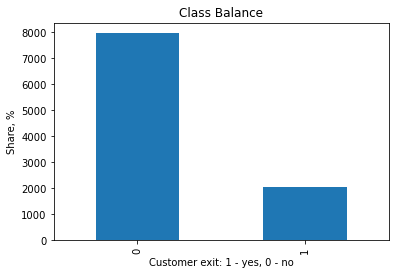

In [34]:
#еще раз выведем диаграмму с балансом классов

users['exited'].value_counts().plot(kind='bar');
plt.title('Class Balance', fontsize=12)
plt.xlabel('Customer exit: 1 - yes, 0 - no')
plt.ylabel('Share, %')
plt.show()

### Взвешивание классов

Этот метод мы опробуем для LogisticRegression, DesicionTree, RandomForest и SVC. GaussianNB и KNN не предполагают балансировку классов, при необходимости предлагается использовать веса образцов при обучении - однако это другой механизм и мы не будем его использовать. 

In [35]:
#переопределим функцию для получения метрик (она будет записывать имя модели в таблицу с меткой class_weight)

def get_scores(target_valid, predicted_valid, score_table):
    f1_value = f1_score(target_valid, predicted_valid)

    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)

    score_table = score_table.append(pd.DataFrame(
        [[type(model).__name__+'_class_weight', f1_value, roc_auc_value]],
        columns=list_of_col), 
        ignore_index=True)
    return score_table

In [36]:
best_f1 = 0
best_iter = 0

for max_iter in range (30, 301, 10):
    model = LogisticRegression(max_iter=max_iter, random_state=17, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_iter = max_iter

probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)
print('Best f1', best_f1, 'was achieved with max_iter =', best_iter)

model = LogisticRegression(max_iter=best_iter, random_state=17, class_weight='balanced');
model.fit(features_train, target_train);
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.4906666666666666 was achieved with max_iter = 30


In [37]:
best_f1 = 0
best_tree_depth = 0

for tree_depth in range (1, 16):
    model = DecisionTreeClassifier(max_depth=tree_depth, random_state=17, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_tree_depth = tree_depth
        
print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth)
model = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=17, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.562862669245648 was achieved with tree_depth = 7


In [38]:
best_f1 = 0
best_tree_depth = 0
best_nestimators = 0

for tree_depth in range(1, 16):
    for estimators in range(10, 151, 10):
        model = RandomForestClassifier(n_estimators=estimators, max_depth=tree_depth, random_state=17, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1_value = f1_score(target_valid, predicted_valid)
        if f1_value > best_f1:
            best_f1 = f1_value
            best_tree_depth = tree_depth
            best_nestimators = estimators

print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth, 'and n_estimators =', best_nestimators)
model = RandomForestClassifier(n_estimators=best_nestimators, max_depth=best_tree_depth, random_state=17, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.6240963855421687 was achieved with tree_depth = 10 and n_estimators = 30


In [39]:
kernel_vars = ['linear', 'poly', 'rbf', 'sigmoid']
opt_kernel = []
best_f1 = 0

for kernel_var in kernel_vars:
    model = SVC(kernel=kernel_var, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        opt_kernel = kernel_var

print('Best f1', best_f1, 'was achieved with', opt_kernel)
model = SVC(kernel=opt_kernel, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

f1_value = f1_score(target_valid, predicted_valid)
decision_score = model.decision_function(features_valid)
roc_auc_value = roc_auc_score(target_valid, decision_score)

score_table = score_table.append(pd.DataFrame(
    [[type(model).__name__+'_class_weight', f1_value, roc_auc_value]],
    columns=list_of_col), 
    ignore_index=True)

Best f1 0.5943852855759922 was achieved with rbf


In [40]:
#выведем таблицу на экран, отсортируем по значению F1

score_table.sort_values(by='f1', ascending=False)

,model,f1,roc-auc score
9,RandomForestClassifier_class_weight,0.624096,0.845564
2,RandomForestClassifier,0.599691,0.846798
10,SVC_class_weight,0.594385,0.838072
1,DecisionTreeClassifier,0.583815,0.818025
8,DecisionTreeClassifier_class_weight,0.562863,0.822582
3,KNeighborsClassifier,0.546269,0.799184
4,SVC,0.531092,0.824228
7,LogisticRegression_class_weight,0.490667,0.761157
5,GaussianNB,0.447244,0.788304
0,LogisticRegression,0.332130,0.756922


**Промежуточные выводы:**</br>
Балансировка классов заметно улучшила показатели случайного леса, SVC и логистической регрессии. При этом для решающего дерева она оказалась бесполезна.</br>

### Апсемплинг

Сбалансируем классы за счёт копирования меньшего класса и перемешивания с бОльшим классом.

In [41]:
#определим функцию, которая будет разделять обучающую выборку на два класса, копировать меньший, соединять обратно и перемешивать

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=17)
    
    return features_upsampled, target_upsampled

In [42]:
#переопределим функцию получения метрик

def get_scores(target_valid, predicted_valid, score_table):
    f1_value = f1_score(target_valid, predicted_valid)

    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)

    score_table = score_table.append(pd.DataFrame(
        [[type(model).__name__+'_upsampled', f1_value, roc_auc_value]],
        columns=list_of_col), 
        ignore_index=True)
    return score_table

In [43]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

(6000, 11) (9666, 11)


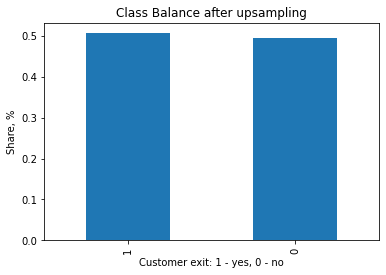

In [44]:
#посмотрим как поменялась форма выборки после апсемплинга и выведем на экран новый баланс классов

print(features_train.shape, features_upsampled.shape)
target_upsampled.value_counts(normalize=True).plot(kind='bar');
plt.title('Class Balance after upsampling', fontsize=12)
plt.xlabel('Customer exit: 1 - yes, 0 - no')
plt.ylabel('Share, %')
plt.show()

**Обучаем модели на новой выборке + делаем проверку на случайной модели**

In [45]:
best_f1 = 0
best_iter = 0

for max_iter in range (30, 301, 10):
    model = LogisticRegression(max_iter=max_iter, random_state=17)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_iter = max_iter

probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)
print('Best f1', best_f1, 'was achieved with max_iter =', best_iter)

model = LogisticRegression(max_iter=best_iter, random_state=17);
model.fit(features_upsampled, target_upsampled);
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)


model = LogisticRegression(random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.4912587412587412 was achieved with max_iter = 30


In [46]:
best_f1 = 0
best_tree_depth = 0

for tree_depth in range (1, 16):
    model = DecisionTreeClassifier(max_depth=tree_depth, random_state=17)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_tree_depth = tree_depth
        
print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth)
model = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5564738292011019 was achieved with tree_depth = 8


In [47]:
best_f1 = 0
best_tree_depth = 0
best_nestimators = 0

for tree_depth in range(1, 16):
    for estimators in range(10, 151, 10):
        model = RandomForestClassifier(n_estimators=estimators, max_depth=tree_depth, random_state=17)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1_value = f1_score(target_valid, predicted_valid)
        if f1_value > best_f1:
            best_f1 = f1_value
            best_tree_depth = tree_depth
            best_nestimators = estimators

print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth, 'and n_estimators =', best_nestimators)
model = RandomForestClassifier(n_estimators=best_nestimators, max_depth=best_tree_depth, random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.6187576126674788 was achieved with tree_depth = 13 and n_estimators = 140


In [48]:
best_f1 = 0
best_nneighbors = 0

for neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_nneighbors = neighbors

print('Best f1', best_f1, 'was achieved with n_neighbors =', best_nneighbors)
model = KNeighborsClassifier(n_neighbors=best_nneighbors)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.567251461988304 was achieved with n_neighbors = 32


In [49]:
kernel_vars = ['linear', 'poly', 'rbf', 'sigmoid']
opt_kernel = []
best_f1 = 0

for kernel_var in kernel_vars:
    model = SVC(kernel=kernel_var)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        opt_kernel = kernel_var

print('Best f1', best_f1, 'was achieved with', opt_kernel)
model = SVC(kernel=opt_kernel)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

f1_value = f1_score(target_valid, predicted_valid)
decision_score = model.decision_function(features_valid)
roc_auc_value = roc_auc_score(target_valid, decision_score)

score_table = score_table.append(pd.DataFrame(
    [[type(model).__name__+'_upsampled', f1_value, roc_auc_value]],
    columns=list_of_col), 
    ignore_index=True)

Best f1 0.586565752128666 was achieved with rbf


In [50]:
model = GaussianNB()
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [51]:
model = DummyClassifier(strategy='stratified', random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [52]:
score_table.sort_values(by='f1', ascending=False)

,model,f1,roc-auc score
9,RandomForestClassifier_class_weight,0.624096,0.845564
14,RandomForestClassifier_upsampled,0.618758,0.848218
2,RandomForestClassifier,0.599691,0.846798
10,SVC_class_weight,0.594385,0.838072
16,SVC_upsampled,0.586566,0.835951
1,DecisionTreeClassifier,0.583815,0.818025
15,KNeighborsClassifier_upsampled,0.567251,0.828387
8,DecisionTreeClassifier_class_weight,0.562863,0.822582
13,DecisionTreeClassifier_upsampled,0.556474,0.815623
3,KNeighborsClassifier,0.546269,0.799184


**Промежуточные выводы:**</br>
Апсемплинг показал самый хороший результат на случайном лесе и методе ближайших соседей, оказавшись эффективнее встроенной балансировки классов.
Для SVC на данной выборке такого не произошло, балансировка классов более эффективна.

### Даунсэмплинг

Сбалансируем классы за счёт сокращения объектов с целевым признаком "0"

In [53]:
#определим функцию для даунсмплинга - она разбивает признаки на две части по значению целевого признака
#сокращает часть с целевым признаком 0 в указаное количество раз
#соединяет всё обратно и перемешивает

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=17)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=17)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=17)
    
    return features_downsampled, target_downsampled

In [54]:
#переопределяем функцию для получения метрик

def get_scores(target_valid, predicted_valid, score_table):
    f1_value = f1_score(target_valid, predicted_valid)

    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)

    score_table = score_table.append(pd.DataFrame(
        [[type(model).__name__+'_downsampled', f1_value, roc_auc_value]],
        columns=list_of_col), 
        ignore_index=True)
    return score_table

In [55]:
#получим новые выборки и целевые признаки для обучения

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

(6000, 11) (2416, 11)


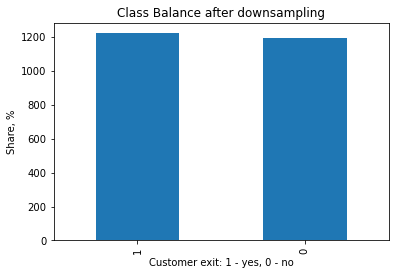

In [56]:
#проверим как изменился размер обучающей выборки и балансировку классов

print(features_train.shape, features_downsampled.shape)
target_downsampled.value_counts().plot(kind='bar');
plt.title('Class Balance after downsampling', fontsize=12)
plt.xlabel('Customer exit: 1 - yes, 0 - no')
plt.ylabel('Share, %')
plt.show()

**Обучаем модели на новой выборке + делаем проверку на случайной модели**

In [57]:
best_f1 = 0
best_iter = 0

for max_iter in range (30, 301, 10):
    model = LogisticRegression(max_iter=max_iter, random_state=17)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_iter = max_iter

probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
roc_auc_value = roc_auc_score(target_valid, probabilities_one_valid)
print('Best f1', best_f1, 'was achieved with max_iter =', best_iter)

model = LogisticRegression(max_iter=best_iter, random_state=17);
model.fit(features_downsampled, target_downsampled);
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)


model = LogisticRegression(random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.49650349650349646 was achieved with max_iter = 30


In [58]:
best_f1 = 0
best_tree_depth = 0

for tree_depth in range (1, 16):
    model = DecisionTreeClassifier(max_depth=tree_depth, random_state=17)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_tree_depth = tree_depth
        
print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth)
model = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=17)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.54638124362895 was achieved with tree_depth = 3


In [59]:
best_f1 = 0
best_tree_depth = 0
best_nestimators = 0

for tree_depth in range(1, 16):
    for estimators in range(10, 151, 10):
        model = RandomForestClassifier(n_estimators=estimators, max_depth=tree_depth, random_state=17)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1_value = f1_score(target_valid, predicted_valid)
        if f1_value > best_f1:
            best_f1 = f1_value
            best_tree_depth = tree_depth
            best_nestimators = estimators

print('Best f1', best_f1, 'was achieved with tree_depth =', best_tree_depth, 'and n_estimators =', best_nestimators)
model = RandomForestClassifier(n_estimators=best_nestimators, max_depth=best_tree_depth, random_state=17)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5885714285714285 was achieved with tree_depth = 8 and n_estimators = 100


In [60]:
best_f1 = 0
best_nneighbors = 0

for neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        best_nneighbors = neighbors

print('Best f1', best_f1, 'was achieved with n_neighbors =', best_nneighbors)
model = KNeighborsClassifier(n_neighbors=best_nneighbors)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
score_table = get_scores(target_valid, predicted_valid, score_table)

Best f1 0.5578747628083491 was achieved with n_neighbors = 46


In [61]:
kernel_vars = ['linear', 'poly', 'rbf', 'sigmoid']
opt_kernel = []
best_f1 = 0

for kernel_var in kernel_vars:
    model = SVC(kernel=kernel_var)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_value = f1_score(target_valid, predicted_valid)
    if f1_value > best_f1:
        best_f1 = f1_value
        opt_kernel = kernel_var

print('Best f1', best_f1, 'was achieved with', opt_kernel)
model = SVC(kernel=opt_kernel)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

f1_value = f1_score(target_valid, predicted_valid)
decision_score = model.decision_function(features_valid)
roc_auc_value = roc_auc_score(target_valid, decision_score)

score_table = score_table.append(pd.DataFrame(
    [[type(model).__name__+'_downsampled', f1_value, roc_auc_value]],
    columns=list_of_col), 
    ignore_index=True)

Best f1 0.5706214689265537 was achieved with poly


In [62]:
model = GaussianNB()
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [63]:
model = DummyClassifier(strategy='stratified', random_state=17)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

score_table = get_scores(target_valid, predicted_valid, score_table)

In [64]:
#выведем на экран таблицу метрик с сортировкой по f1

score_table.sort_values(by='f1', ascending=False)

,model,f1,roc-auc score
9,RandomForestClassifier_class_weight,0.624096,0.845564
14,RandomForestClassifier_upsampled,0.618758,0.848218
2,RandomForestClassifier,0.599691,0.846798
10,SVC_class_weight,0.594385,0.838072
22,RandomForestClassifier_downsampled,0.588571,0.851465
16,SVC_upsampled,0.586566,0.835951
1,DecisionTreeClassifier,0.583815,0.818025
24,SVC_downsampled,0.570621,0.836081
15,KNeighborsClassifier_upsampled,0.567251,0.828387
8,DecisionTreeClassifier_class_weight,0.562863,0.822582


In [65]:
#выведем на экран таблицу метрик с сортировкой по площади под ROC-кривой

score_table.sort_values(by='roc-auc score', ascending=False)

,model,f1,roc-auc score
22,RandomForestClassifier_downsampled,0.588571,0.851465
14,RandomForestClassifier_upsampled,0.618758,0.848218
2,RandomForestClassifier,0.599691,0.846798
9,RandomForestClassifier_class_weight,0.624096,0.845564
10,SVC_class_weight,0.594385,0.838072
24,SVC_downsampled,0.570621,0.836081
16,SVC_upsampled,0.586566,0.835951
15,KNeighborsClassifier_upsampled,0.567251,0.828387
4,SVC,0.531092,0.824228
8,DecisionTreeClassifier_class_weight,0.562863,0.822582


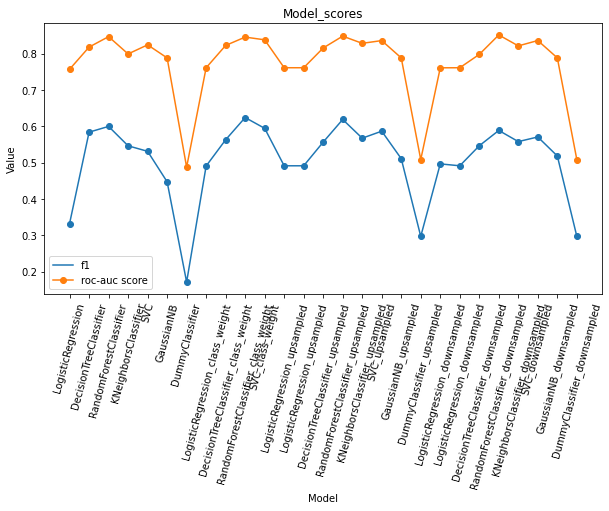

In [66]:
ax = score_table.plot(x='model', y='f1', style='-o', figsize=(10, 5));
score_table.plot(x='model', y='roc-auc score', style='-o', ax=ax, figsize=(10, 5));
plt.title('Model_scores', fontsize=12)
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(np.arange(len(score_table)), score_table['model'])
plt.xticks(rotation = 75)
plt.show()

### Выводы

Проведена балансировка выборки с помощью взвешивания, апсемплинга и даунсемплинга. Большинство рассмотренных методов в рамках данной задачи положительно отзывались на балансировку обучающей выборки. </br>
По результатам рассмотрения F1 наилучшие результаты на валидационной выборке показали случайный лес и метод опорных векторов. При этом для случайного леса результаты на сбалансированной "вручную" выборке оказались лучше, чем при использовании взвешивания с помощью class_weight, а для SVC - наоборот. </br>


### Финальное тестирование

Проверим результаты лучшей модели - случайного леса - на тестовой выборке.

In [68]:
#проверим результат взвешенной модели на тестовой выборке

model = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=17, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('F1 score:', f1_score(target_test, predicted_test))

probabilities_one_test = model.predict_proba(features_test)[:, 1]
print('ROC-AUC score:', roc_auc_score(target_test, probabilities_one_test))

F1 score: 0.6085918854415274
ROC-AUC score: 0.8540821252685659


После подбора гиперпараметров удалось достичь F1 = 0.59 на тестовой выборке.</br>
Попробуем еще раз обучить модель, используя при этом и обучающую, и валидационную выборки.

In [69]:
#объединяем выборки

features_all = pd.concat([features_train] + [features_valid])
target_all = pd.concat([target_train] + [target_valid])

In [70]:
#проверяем размеры до и после объединения, проверяем баланс классов

print(features_train.shape, features_valid.shape, features_all.shape)
target_all.value_counts(normalize=True)

(6000, 11) (2000, 11) (8000, 11)


0    0.79625
1    0.20375
Name: exited, dtype: float64

In [71]:
model = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=17, class_weight='balanced')
model.fit(features_all, target_all)
predicted_test = model.predict(features_test)
print('F1 score:', f1_score(target_test, predicted_test))

probabilities_one_test = model.predict_proba(features_test)[:, 1]
print('ROC-AUC score:', roc_auc_score(target_test, probabilities_one_test))

F1 score: 0.6204465334900118
ROC-AUC score: 0.8609580304495559


Несмотря на небольшой дисбаланс классов в новой обучающей выборке, результат F1 и ROC-AUC на тестовой выборке удалось улучшить.

In [72]:
#посмотрим, какие параметры оказались самыми важными для модели

feats = {}
for feature, importance in zip(features_downsampled.columns,model.feature_importances_):
    feats[feature] = importance
feature_importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

In [73]:
feature_importances.sort_values(by='Importance', ascending=False)

,Importance
age,0.324606
numofproducts,0.210883
balance,0.111624
estimatedsalary,0.081155
creditscore,0.080077
isactivemember,0.053064
geography_Germany,0.048687
tenure,0.045703
gender_Male,0.023381
hascrcard,0.011355


В дальнейшем можно попробовать улучшить качество модели за счёт удаления "неважных" столбцов или другой предобработки важных.</br>

In [75]:
#повторим тестирование со случайным лесом для апсемплированной выборки

model = RandomForestClassifier(n_estimators=140, max_depth=13, random_state=17)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print('F1 score:', f1_score(target_test, predicted_test))

probabilities_one_test = model.predict_proba(features_test)[:, 1]
print('ROC-AUC score:', roc_auc_score(target_test, probabilities_one_test))

F1 score: 0.6002460024600246
ROC-AUC score: 0.8540250574148879


In [76]:
features_upsampled_all = pd.concat([features_upsampled] + [features_valid])
target_upsampled_all = pd.concat([target_upsampled] + [target_valid])

In [77]:
model = RandomForestClassifier(n_estimators=70, max_depth=11, random_state=17)
model.fit(features_upsampled_all, target_upsampled_all)
predicted_test = model.predict(features_test)

print('F1 score:', f1_score(target_test, predicted_test))

probabilities_one_test = model.predict_proba(features_test)[:, 1]
print('ROC-AUC score:', roc_auc_score(target_test, probabilities_one_test))

F1 score: 0.6236559139784947
ROC-AUC score: 0.8635507618558466


In [78]:
#посмотрим, какие параметры оказались самыми важными для модели

feats = {}
for feature, importance in zip(features_downsampled.columns,model.feature_importances_):
    feats[feature] = importance
feature_importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})

In [79]:
feature_importances.sort_values(by='Importance', ascending=False)

,Importance
age,0.317740
numofproducts,0.193609
balance,0.120068
estimatedsalary,0.087734
creditscore,0.084732
isactivemember,0.055180
tenure,0.051490
geography_Germany,0.043634
gender_Male,0.024494
hascrcard,0.010997


При работе с увеличенной выборкой значимость признаков немного поменялась, хотя "топ-3" остался неизменным.

### Выводы

Проведено финальное тестирование модели случайного леса с полученными гиперпараметрами, необходимая точность F1 достигнута.</br>
Учшить F1 score позволяет дообучение модели на данных обучающей и валидационной выборок (после построения модели и ее валидации).</br>

## Final resume

###### Построена модель, которая на основании исторических данных о поведении клиентов банка предсказывает уйдет ли клиент из банка.
В ходе работы были отобраны наиболее важные признаки, проведено прямое кодирование категориальных признаков и масштабирование количественных признаков.</br>
Для балансировки классов рассмотрены метод взвешивания, апсемплинга и даунсемплинга.</br>
Были рассмотрены шесть моделей:</br>
- логистическая регрессию
- дерево решений
- случайный лес
- метод К-ближайших соседей
- метод оборных векторов
- наивный байесовский классификатор
</br></br>


Лучшие результаты показали случайный лес и метод опорных векторов.</br>
Проведена настройка гиперпараметров для этих двух моделей. Достигнут требуемый порог F1 = 0.59, рассмотрена величина ROC-AUC.</br>
Проведена проверка на тестовой выборке, лучший результат на имеющихся данных получен при следующих параметрах:</br>
**Модель:** Random Forest Classifier</br>
**Параметры:** n_estimators=70, max_depth=11, random_state=17</br>
**Обучение:** обучающая выборка с апсемплингом</br>
**Полученный результат на тестовой выборке:</br>**
**F1 score:** 0.62</br>
**ROC-AUC score:** 0.86</br>
</br>
Проверка на адекватность проводилась сравнением с результатом случайной модели.</br>